In [164]:
import sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from pretty_plots import plot_pretty
from numpy import NaN

In [260]:
def vol(r):
    return (4/3) * np.pi * r**3
def mipd(n,r):
    return vol(r)/n
def error(n,r,precision="f8",eps=0):
    ray = sim.utils.ray(np.array([1,0,0]),r*2,25)
    analytics = sim.halos.Analytic.Uniform(ray,r=r,M=r)
    df = sim.halos.Sample.Uniform(n,r=r,M=r)
    out,time = sim.static_solver.evaluate(ray,df,precision=precision,eps=eps)
    diff = out.astype(np.float64)-analytics
    var = np.var(diff)
    err = np.abs(diff)/np.abs(analytics)
    max_err = np.max(err)
    mean_err = np.mean(err)
    return mean_err,max_err,var
    

In [261]:
n = 1000000


In [270]:
def get_max_mipd(precision,n=1000000,eps_frac = 1/10,res = 40):
    rs = 10.0**(-(np.linspace(-2.5,1,res)))
    means = []
    mipds = []
    for r in tqdm(rs):
        for i in range(2):
            eps = mipd(n,r) * eps_frac
            mean,_,_ = error(n,r,precision=precision,eps=eps)
            means.append(mean)
            mipds.append(mipd(n,r))
            if mean == float('inf') or np.isnan(mean):
                break
    return means,mipds

In [265]:
means_f2,xs_f2 = get_max_mipd("f2",eps_frac = 0)
means_f4,xs_f4 = get_max_mipd("f4",eps_frac = 0)
means_f8,xs_f8 = get_max_mipd("f8",eps_frac = 0)

100%|██████████| 40/40 [00:55<00:00,  1.39s/it]


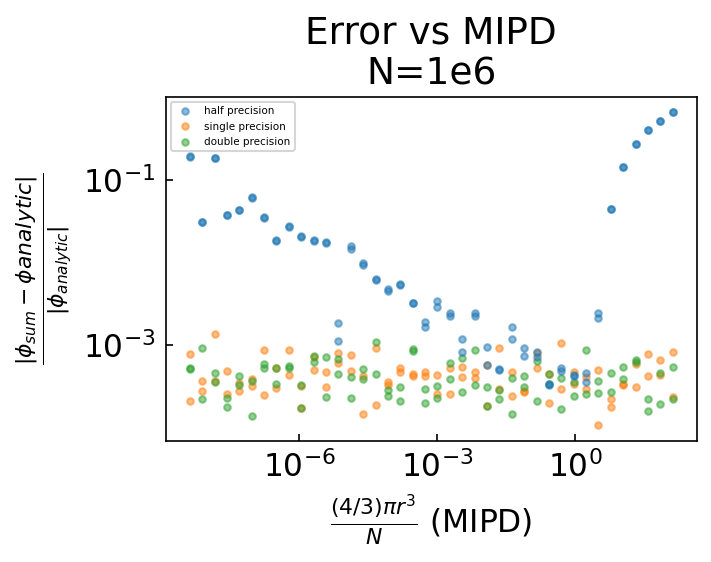

In [266]:
plot_pretty()
s = 10
alpha = 0.5
plt.scatter(xs_f2,means_f2,label="half precision",zorder=1,s=s,alpha=alpha)
plt.scatter(xs_f4,means_f4,label="single precision",zorder=0,s=s,alpha=alpha)
plt.scatter(xs_f8,means_f8,label="double precision",zorder=0,s=s,alpha=alpha)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel(r"$\frac{|\phi_{sum} - \phi{analytic}|}{|\phi_{analytic}|}$")
plt.xlabel(r"$\frac{{(4/3)}\pi r^3}{N}$ (MIPD)")
plt.title("Error vs MIPD\nN=1e6")
plt.tight_layout()
plt.savefig("plots/mipd/n_1000000.jpg")
plt.show()

In [273]:
means_f2,xs_f2 = get_max_mipd("f2",eps_frac = 1/10,res = 40)
means_f4,xs_f4 = get_max_mipd("f4",eps_frac = 1/10,res = 40)
means_f8,xs_f8 = get_max_mipd("f4",eps_frac = 1/10,res = 40)

100%|██████████| 40/40 [00:48<00:00,  1.22s/it]


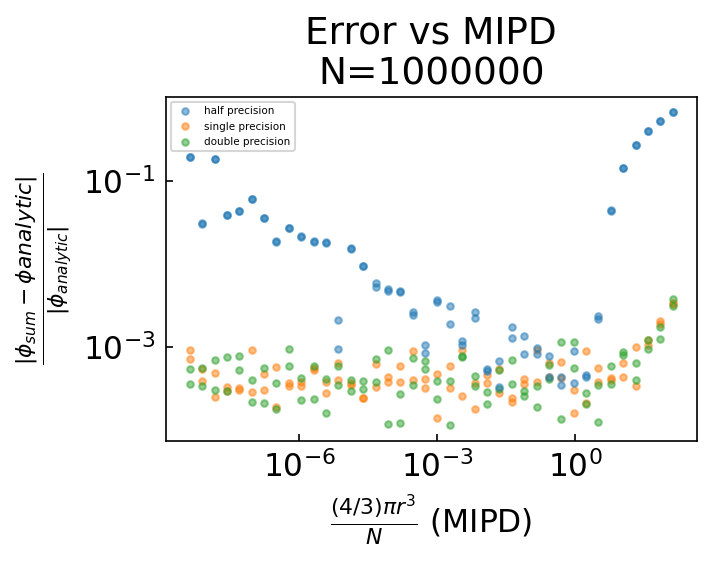

In [274]:
plot_pretty()
s = 10
alpha = 0.5
plt.scatter(xs_f2,means_f2,label="half precision",zorder=1,s=s,alpha=alpha)
plt.scatter(xs_f4,means_f4,label="single precision",zorder=0,s=s,alpha=alpha)
plt.scatter(xs_f8,means_f8,label="double precision",zorder=0,s=s,alpha=alpha)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.ylabel(r"$\frac{|\phi_{sum} - \phi{analytic}|}{|\phi_{analytic}|}$")
plt.xlabel(r"$\frac{{(4/3)}\pi r^3}{N}$ (MIPD)")
plt.title("Error vs MIPD\nN=1000000")
plt.tight_layout()
#plt.savefig("plots/mipd/n_1000000.jpg")
plt.show()